# En esta Notebook veremos el siguiente contenido:

* TF-IDF

# Trabajaremos con un dataset  de críticas de películas de IMDB

IMDb (Internet Movie Database) es una base de datos en línea que recopila información sobre películas, programas de televisión, actores, directores, productores y otros aspectos relacionados con la industria del entretenimiento.




# Importamos librerías y Previsualizamos los datos

In [ ]:
# Importamos algunas de las librerías necesarias
!pip install -q gdown

import gdown
import pandas as pd
import numpy as np


In [ ]:
# ID del archivo compartido en Google Drive
file_id = '1DudhDzBrbOJthWXlOyyW1hvFfG3LaIaS'

url = f'https://drive.google.com/uc?id={file_id}'

# Descargamos el archivo con gdown
gdown.download(url, 'IMDB_esp.csv', quiet=False)

# Leemos el archivo CSV descargado
df = pd.read_csv('IMDB_esp.csv', encoding='utf-8')

# Mostramos las primeras filas
df.head(10)

Downloading...
From (original): https://drive.google.com/uc?id=1DudhDzBrbOJthWXlOyyW1hvFfG3LaIaS
From (redirected): https://drive.google.com/uc?id=1DudhDzBrbOJthWXlOyyW1hvFfG3LaIaS&confirm=t&uuid=a0258f76-3f90-47c7-b6fd-ab7f6d9dffb9
To: /content/IMDB_esp.csv
100%|██████████| 137M/137M [00:01<00:00, 97.0MB/s]


,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
5,5,"Probably my all-time favorite movie, a story o...",Probablemente mi película favorita de todos lo...,positive,positivo
6,6,I sure would like to see a resurrection of a u...,Seguro que me gustaría ver una resurrección de...,positive,positivo
7,7,"This show was an amazing, fresh & innovative i...","Este espectáculo fue una idea increíble, fresc...",negative,negativo
8,8,Encouraged by the positive comments about this...,Alentados por los comentarios positivos sobre ...,negative,negativo
9,9,If you like original gut wrenching laughter yo...,"Si te gusta la risa original desgarradora, te ...",positive,positivo


In [ ]:
# Definimos nuevamente el dataframe utilizando solo dos columnas.
df = df[["review_es","sentimiento"]]

In [ ]:
# Cambiamos el nombre de la columna "sentimiento" por "valoración"
df = df.rename(columns={"sentimiento": "valoración"})

In [ ]:
# Cambiamos los valores de la columna Valoración por 1 cuando se trata de "positivo" y 0 si se trata de "negativo"
df['valoración'] = df['valoración'].map({'positivo': 1, 'negativo': 0})

In [ ]:
# Configura pandas para mostrar todo el contenido de cada celda (sin truncar)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Previsualizamos el nuevo df
df.head(10)

,review_es,valoración
0,"Uno de los otros críticos ha mencionado que después de ver solo 1 Oz Episodio, estará enganchado. Tienen razón, ya que esto es exactamente lo que sucedió conmigo. La primera cosa que me golpeó sobre Oz fue su brutalidad y sus escenas de violencia inconfiadas, que se encuentran a la derecha de la palabra. Confía en mí, este no es un espectáculo para los débiles de corazón o tímido. Este espectáculo no extrae punzones con respecto a las drogas, el sexo o la violencia. Es Hardcore, en el uso clásico de la palabra. Se llama OZ, ya que es el apodo dado al Penitenciario del Estado de Seguridad Máximo de Oswald. Se centra principalmente en la ciudad de Emeralda, una sección experimental de la prisión donde todas las células tienen frentes de vidrio y se enfrentan hacia adentro, por lo que la privacidad no es alta en la agenda. Em City es el hogar de muchos ... Fariarios, musulmanes, gangstas, latinos, cristianos, italianos, irlandeses y más ... así que las esposas, las miradas de muerte, las relaciones peligrosas y los acuerdos sombreados nunca están lejos. Yo diría el principal atractivo de El espectáculo se debe al hecho de que va donde otros espectáculos no se atreverían. Olvídate de las imágenes bonitas pintadas para las audiencias convencionales, olvidan el encanto, olviden el romance ... Oz no se mete. El primer episodio que he visto me sorprendió tan desagradable que fue surrealista, no podía decir que estaba listo para ello, pero cuando observé más, desarrollé un gusto por Oz, y me acostumbré a los altos niveles de violencia gráfica. No solo la violencia, sino la injusticia (Guardias torcidas que se vendrán por un níquel, los reclusos que se matarán en orden y se alejarán con él, de manera educada, los reclusos de clase media se convirtieron en perras de la prisión debido a su falta de habilidades callejeras O experiencia en la prisión) viendo oz, puede sentirse cómodo con lo que es incómodo visualización ... eso es si puedes ponerte en contacto con tu lado más oscuro.",1
1,"Una pequeña pequeña producción.La técnica de filmación es muy incuestionable, muy antigua, la moda de la BBC y le da una sensación de realismo reconfortante, y, a veces, incómodo, y, a veces, a la pieza.Los actores son extremadamente bien elegidos, Michael Sheen, no solo ""tiene todo el polari"", ¡pero tiene todas las voces por palmaditas!Realmente puede ver la edición perfecta guiada por las referencias a las entradas del diario de Williams, no solo vale la pena la observación, pero es una pieza imperrementemente escrita y realizada.Una producción magistral sobre uno de los grandes maestros de la comedia y su vida.El realismo realmente llega a casa con las pequeñas cosas: la fantasía del guardia que, en lugar de usar las técnicas de ""sueño"" tradicionales permanece sólido, entonces desaparece.Se desempeña nuestro conocimiento y nuestros sentidos, particularmente con las escenas relacionadas con Orton y Halliwell y los conjuntos (particularmente de su apartamento con murales de Halliwell que decoran cada superficie) están terriblemente bien hechos.",1
2,"Pensé que esta era una manera maravillosa de pasar tiempo en un fin de semana de verano demasiado caliente, sentado en el teatro con aire acondicionado y observando una comedia alegre.La parcela es simplista, pero el diálogo es ingenioso y los personajes son agradables (incluso el asesino en serie de la sospecha de pan del pozo).Mientras que algunos pueden decepcionarse cuando se dan cuenta de que este no es el punto de partido 2: la adicción al riesgo, pensé que era una prueba de que Woody Allen todavía está en control del estilo que muchos de nosotros hemos crecido a amar. Esto fue el más reído.En una de las comedias de Woody en años (¡Dare, digo una década?).Mientras nunca me quedé impresionado con Scarlet Johanson, en esto logró tonificar su imagen ""sexy"" y saltó a una joven promedio, pero enérgica. Esto puede que no sea la joya de la corona de su carrera, pero fue Wittier.

In [ ]:
pd.reset_option('display.max_colwidth') # Volvemos a las configuraciones por default


In [ ]:
df[["review_es","valoración"]]

,review_es,valoración
0,Uno de los otros críticos ha mencionado que de...,1
1,Una pequeña pequeña producción.La técnica de f...,1
2,Pensé que esta era una manera maravillosa de p...,1
3,"Básicamente, hay una familia donde un niño peq...",0
4,"El ""amor en el tiempo"" de Petter Mattei es una...",1
...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,1
49996,"Mala parcela, mal diálogo, mala actuación, dir...",0
49997,Soy católica enseñada en escuelas primarias pa...,0
49998,Voy a tener que estar en desacuerdo con el com...,0


# TF-IDF
TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica de procesamiento de texto que mide la relevancia de una palabra en un documento en relación con un conjunto de documentos (corpus).

Term Frequency (TF): Calcula cuántas veces aparece una palabra en un documento, normalizando por la longitud del documento.

Inverse Document Frequency (IDF): Evalúa la importancia de la palabra en el corpus, disminuyendo su peso si aparece en muchos documentos.

El TfidfVectorizer de scikit-learn convierte texto en una matriz de características TF-IDF, lo que facilita el uso de modelos de aprendizaje automático para tareas como clasificación y agrupamiento de textos.

TF-IDF se utiliza como una técnica de extracción de características en el procesamiento de lenguaje natural, convirtiendo documentos de texto en vectores numéricos. Estos vectores representan la relevancia de las palabras en los documentos.

Cada palabra en cada documento tiene su propio valor TF-IDF. Este valor indica cuán importante es una palabra dentro de ese documento en relación con su frecuencia en el corpus entero.

En una regresión logística, se utilizan estos vectores como entradas para el modelo. La regresión logística entonces analiza la relación entre las características TF-IDF y la variable objetivo (como el sentimiento), permitiendo predecir clases binarias (por ejemplo, positivo o negativo) según la importancia de las palabras en el texto.

# Objetivo
Construir un modelo de clasificación que, a partir de una reseña de película en español (review_es), prediga si la valoración es positiva (1) o negativa (0) (valoración), usando TF-IDF para transformar el texto y Regresión Logística como algoritmo de aprendizaje.

# Entrenamos el modelo

In [ ]:
# Confeccionamos un algoritmo TFIDF que me prediga si la valoración es positiva o negativa. La columna label se llama valoración y la columna con la variable predictora que contiene strings es review_es

from sklearn.model_selection import train_test_split # Se usa para dividir los datos en entrenamiento y prueba (modelo aprende con un conjunto y se evalúa con otro).
from sklearn.feature_extraction.text import TfidfVectorizer # Convierte texto en una matriz numérica usando TF-IDF (frecuencia inversa de documentos).
from sklearn.linear_model import LogisticRegression # Algoritmo de clasificación binaria (positivo vs. negativo en este caso).
from sklearn.metrics import accuracy_score # Para medir qué tan bien predice el modelo en datos nuevos (exactitud). Accuracy mide el porcentaje total de predicciones correctas sobre el total de casos.
from sklearn.metrics import precision_score # Para medir el costo de un falso positivo es alto (por ejemplo, recomendar una película mala como buena). Precision mide qué proporción de las predicciones positivas hechas por el modelo son realmente positivas.
from sklearn.metrics import recall_score # Para medir cuántos de los casos positivos reales fueron capturados por el modelo.
from sklearn.metrics import f1_score # Para medir el promedio armónico entre precisión y recall. Un buen balance si ambas cosas son importantes.
from sklearn.metrics import confusion_matrix # La Matriz de Confusión es útil para Muestra los aciertos y errores del modelo organizados por clase.
from sklearn.metrics import roc_auc_score # El ROC AUC SCORE evalúa qué tan bien el modelo separa las clases.
import seaborn as sns # Para graficar la matriz de confusión.Rol: Se usa para crear gráficos estadísticos elegantes. En este caso, se usa sns.heatmap() para visualizar la matriz de confusión como un mapa de calor con colores y anotaciones.
import matplotlib.pyplot as plt # Para graficar la matriz de confusión. Es la librería base de visualización. Acá se usa para mostrar el gráfico (plt.show()) y para agregar etiquetas y títulos (plt.xlabel(), plt.ylabel(), plt.title()).


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df['review_es'], df['valoración'], test_size=0.2, random_state=42
)

# Crear un vectorizador TF-IDF ( Instanciamos el vectorizador, es decir, creamos el objeto del modelo o herramienta a usar)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Puedes ajustar max_features

# Ajustar y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Crear un modelo de regresión logística
# Abajo tenés un código con los parámetros expresados de forma que puedas ir modificandolos
model = LogisticRegression() #Instanciamos el modelo

# Entrenar el modelo
model.fit(X_train_tfidf, y_train) # Fiteamos, es decir, el modelo aprende a partir de los datos de entrenamiento

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_tfidf) # Predecir


In [ ]:
# Si desearamos modificar algunos parámetros de esta Regresión Logística podríamos:
"""model = LogisticRegression(
    penalty='l2',             # Regularización L2 (ridge). Alternativas: 'l1', 'elasticnet', 'none'
    C=1.0,                    # Inverso de la fuerza de regularización. Menores = más regularización (ej: 0.1, 0.01)
    solver='lbfgs',           # Algoritmo de optimización. Otros: 'liblinear', 'saga', 'newton-cg', 'sag'
    max_iter=100,             # Iteraciones máximas. Podrías aumentar si el modelo no converge (ej: 200, 500, 1000)
    class_weight=None,        # Por defecto trata todas las clases igual. Podrías usar 'balanced' si hay desbalance
    random_state=None,        # Para resultados reproducibles. Ejemplo: random_state=42
    fit_intercept=True,       # Incluir término independiente. Podrías poner False si ya escalaste los datos
    multi_class='auto',       # Detecta automáticamente si es binaria o multiclase. Otros: 'ovr', 'multinomial'
    warm_start=False,         # Si True, reutiliza soluciones previas al volver a ajustar. Útil en ciclos
    n_jobs=None,              # Paralelismo (solo afecta algunos solvers como 'liblinear'). Ej: n_jobs=-1 para usar todos los núcleos
    l1_ratio=None             # Solo se usa con penalty='elasticnet'. Va entre 0 y 1 (0 = L2, 1 = L1)
)
"""

"model = LogisticRegression(\n    penalty='l2',             # Regularización L2 (ridge). Alternativas: 'l1', 'elasticnet', 'none'\n    C=1.0,                    # Inverso de la fuerza de regularización. Menores = más regularización (ej: 0.1, 0.01)\n    solver='lbfgs',           # Algoritmo de optimización. Otros: 'liblinear', 'saga', 'newton-cg', 'sag'\n    max_iter=100,             # Iteraciones máximas. Podrías aumentar si el modelo no converge (ej: 200, 500, 1000)\n    class_weight=None,        # Por defecto trata todas las clases igual. Podrías usar 'balanced' si hay desbalance\n    random_state=None,        # Para resultados reproducibles. Ejemplo: random_state=42\n    fit_intercept=True,       # Incluir término independiente. Podrías poner False si ya escalaste los datos\n    multi_class='auto',       # Detecta automáticamente si es binaria o multiclase. Otros: 'ovr', 'multinomial'\n    warm_start=False,         # Si True, reutiliza soluciones previas al volver a ajustar. Útil en

Breve recordatorio sobre convergencia que nos va a servir para más adelante en el curso.

Cuando decimos que un modelo "no converge", nos referimos a que el algoritmo no logra encontrar los valores óptimos de los parámetros que minimizan la función de pérdida (es decir, no encuentra una solución estable) dentro del número de iteraciones permitidas.

En otras palabras:

📉 Durante el entrenamiento, el modelo va ajustando sus parámetros paso a paso para que las predicciones se acerquen a los valores reales. Si después de muchas iteraciones los errores no se estabilizan (o no dejan de cambiar), decimos que no converge.

In [ ]:
# Evaluando el modelo a partir distintas métricas:

# Accuracy:Para medir qué tan bien predice el modelo en datos nuevos (exactitud).
# Accuracy mide el porcentaje total de predicciones correctas sobre el total de casos.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")

# Precision: Para medir el costo de un falso positivo es alto (por ejemplo, recomendar una película mala como buena).
# Precision mide qué proporción de las predicciones positivas hechas por el modelo son realmente positivas.
precision = precision_score(y_test, y_pred)
print(f"Precisión: {precision}")

# Recall: Para medir cuántos de los casos positivos reales fueron capturados por el modelo.
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# f1 Score: Para medir el promedio armónico entre precisión y recall. Un buen balance si ambas cosas son importantes.
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# ROC AUC SCORE evalúa qué tan bien el modelo separa las clases.
cm = confusion_matrix(y_test, y_pred)
y_proba = model.predict_proba(X_test_tfidf)[:, 1]  # Probabilidades para la clase positiva
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc}")


Accuracy del modelo: 0.8763
Precisión: 0.8702765874561745
Recall: 0.8866838658463981
F1 Score: 0.8784036174186572
ROC AUC: 0.9491429858592598


- Accuracy (0.8763): El 87.63% de las valoraciones fueron clasificadas correctamente. Es una medida global del desempeño.

- Precisión (0.8703): De todas las predicciones que fueron "positivas", el 87.03% realmente lo eran. Mide cuántos falsos positivos estás evitando.

- Recall (0.8867): De todas las valoraciones realmente "positivas", el 88.67% fueron detectadas. Mide cuántos verdaderos positivos estás capturando.

- F1 Score (0.8784): Equilibrio entre precisión y recall. Es útil cuando hay cierto desequilibrio entre clases.

- ROC AUC (0.9491): Mide la capacidad del modelo para distinguir entre clases. Un valor cercano a 1 indica una excelente discriminación entre "positivo" y "negativo".

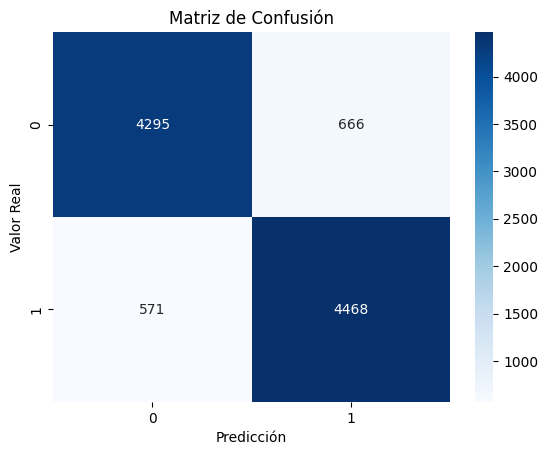

In [ ]:
# Matriz de Confusión:
# La Matriz de Confusión es útil para Muestra los aciertos y errores del modelo organizados por clase.

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Observamos los errores tipo 1 y tipo 2:


**Observamos los errores tipo 1 y tipo 2:**

Error Tipo I (Falso Positivo): El modelo predice que una reseña es positiva (1) cuando en realidad es negativa (0). Es decir, se rechaza incorrectamente la hipótesis nula. En la matriz de confusión, aparece en la celda donde el valor real es 0 y la predicción es 1.

Error Tipo II (Falso Negativo): El modelo predice que una reseña es negativa (0) cuando en realidad es positiva (1). O sea, se acepta incorrectamente la hipótesis nula. En la matriz, está donde el valor real es 1 y la predicción es 0.

**Observamos los resultados**

Verdaderos negativos (TN) = 4295
→ Reseñas negativas que fueron correctamente clasificadas como negativas.

Falsos positivos (FP) = 666
→ Reseñas negativas que el modelo clasificó incorrectamente como positivas.

Falsos negativos (FN) = 571
→ Reseñas positivas que fueron clasificadas incorrectamente como negativas.

Verdaderos positivos (TP) = 4468
→ Reseñas positivas correctamente clasificadas como positivas.


**Conclusión de la matriz de confusión**

El modelo comete más errores al predecir positivas que negativas (666 vs. 571), aunque el número es relativamente bajo respecto al total.

Tiene un buen equilibrio entre detectar correctamente reseñas positivas y negativas (ver TP y TN).

Esto respalda las métricas que obtuviste: recall alto (recupera bien las positivas), precisión decente (no se equivoca demasiado al predecir positivas), y un F1 score sólido.

# Visualizamos palabras asociadas a reseñas positivas y negativas.


In [ ]:
# Obtenemos las palabras del vocabulario
palabras = tfidf_vectorizer.get_feature_names_out()

# Coeficientes del modelo (uno por palabra)
coeficientes = model.coef_[0]

# Creamos un DataFrame para visualizarlo
df_coef = pd.DataFrame({'palabra': palabras, 'coeficiente': coeficientes})

# Ordenamos por importancia
df_coef = df_coef.sort_values(by='coeficiente', ascending=False)

# En la primera columna veremos el número "índice" de cada palabra según el órden en que fueron procesadas en el modelo.

# Mostramos las 10 palabras más asociadas a valoración positiva y negativa
print("🔼 Palabras más asociadas a reseñas positivas:")
print(df_coef.head(10))

print("\n🔽 Palabras más asociadas a reseñas negativas:")
print(df_coef.tail(10))




🔼 Palabras más asociadas a reseñas positivas:
              palabra  coeficiente
1799        excelente     8.030292
1562          encantó     4.726374
3462         perfecto     4.435812
2046           genial     4.367309
2847      maravillosa     4.354388
546         brillante     4.334044
1392         disfruté     4.318003
2098             gran     4.285585
1211  definitivamente     4.255959
2300              hoy     4.225061

🔽 Palabras más asociadas a reseñas negativas:
        palabra  coeficiente
1190  decepción    -5.254032
3552      pobre    -5.477644
2814        mal    -5.901046
64     aburrido    -6.331550
62     aburrida    -6.661997
2815       mala    -7.137889
3445     peores    -7.162708
4505   terrible    -7.395258
2288   horrible    -8.984978
3444       peor   -10.456114


Interpretamos los resultados.
La primera columna muestra el índice de cada palabra, es decir, el órden en que fue procesada por el modelo.
La segunda columna muestra las palabras procesadas. En este caso, aquellas con mayor impacto (peso) en las reseñas positivas y negativas.
El coeficiente refleja los pesos aprendidos por el model para cada palabra, es decir, cuánto contribuye esa palabra a que una review sea clasificada como positiva ( si el coeficiente es positivio) y negativa (si el coeficiente es negativo).
Aclaración: Los coeficientes no vienen del TF-IDF, sino del modelo de regresión logística.


# Matriz del modelo TF-IDF
# ¿Qué representan estos valores?
Cada celda del DataFrame (tfidf_df) representa el valor TF-IDF (Term Frequency-Inverse Document Frequency) de una palabra en una review.



In [ ]:
# Creamos una matriz para visualizar la importancia de cada palabra en cada una de las reviews de acuerdo al TfidfVectorizer
# Las filas del dataframe serán nuestras reviews y las columnas serán cada una de las palabras utilizadas.
# Los valores dentro son coeficientes asignados por el modelo en el que asigna un puntaje representando la importancia de cada término en esa oración.

# Configuramos NumPy para mostrar todos los elementos sin truncar
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# Convertimos a DataFrame para mejor visualización
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostramos algunas filas
print(tfidf_df.head(20))

          00  000        10  100   11   12   13   14   15   16  ...  última  \
0   0.000000  0.0  0.037262  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
1   0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
2   0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
3   0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
4   0.098505  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
5   0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
6   0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
7   0.000000  0.0  0.126330  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
8   0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
9   0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
10  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
11  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0

Interpretamos el dataframe tfidf_df.
El DataFrame tfidf_df contiene los valores TF-IDF para cada palabra en cada review. Es decir, cuánto "pesa" una palabra en una oración específica, según la fórmula de TF-IDF.

In [ ]:
# Si quisieramos los valores máximos y mínimos

print("Valor máximo en la matriz TF-IDF:", tfidf_df.max().max())
print("Valor mínimo distinto de cero:", tfidf_df[tfidf_df > 0].min().min())


Valor máximo en la matriz TF-IDF: 0.9328102764294517
Valor mínimo distinto de cero: 0.0012277910288929284


# Validación Cruzada o Cross-Validation

In [ ]:
# Aplicamos Validación cruzada para evaluar la robustez del modelo y asegurarnos
# que no esté sesgado por la partición aleatoria de los datos en entrenamiento y prueba.

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Pipeline que junta vectorizador y modelo
pipeline = make_pipeline(
    TfidfVectorizer(max_features=5000),
    LogisticRegression()
)

# Validación cruzada con 5 particiones (k-fold = 5)
scores = cross_val_score(pipeline, df['review_es'], df['valoración'], cv=5, scoring='accuracy')

# Resultados
print(f"Precisión media con validación cruzada: {scores.mean():.3f}")
print(f"Desviación estándar: {scores.std():.3f}")


Precisión media con validación cruzada: 0.874
Desviación estándar: 0.003


**Interpretación de la valoración cruzada**

**Resultado de la validación cruzada:**
- Precisión media (mean accuracy): 0.874 → significa que nuestro modelo clasificó correctamente el 87.4% de las veces en promedio a lo largo de todas las particiones de la validación cruzada.

- Desviación estándar (std): 0.003 → indica que el rendimiento del modelo es muy estable entre las diferentes particiones(folds). Recordemos que entre más bajo este número, mejor: muestra que el modelo no es muy sensible a la división de los datos.

** Interpretación práctica:**
- El modelo generaliza bien: tiene buena precisión promedio.

- No hay gran variabilidad en los resultados entre las particiones, lo que indica consistencia.

- Si el modelo estuviera sobreajustado o fuera inestable, veríamos una desviación estándar más alta.


In [ ]:
# Probamos el modelo con una nueva reseña

nueva_reseña = "Es una serie mala, aburrida, enojada, que cuenta los inicios de los anillos del poder"  # Reemplaza con la reseña que deseas probar
nueva_reseña_tfidf = tfidf_vectorizer.transform([nueva_reseña])
prediccion = model.predict(nueva_reseña_tfidf)

# Obtener la probabilidad de la predicción
probabilidadpositiva = model.predict_proba(nueva_reseña_tfidf)

# Obtener la probabilidad en la clase predicha (0 o 1)
probabilidad = probabilidadpositiva[0][1]  # Probabilidad de la clase "positivo"

print(f"Se predice que la crítica es de caracter {prediccion[0]}")
print(f" con una probabilidad de que sea positiva de {probabilidad:.2f}")



Se predice que la crítica es de caracter 0
 con una probabilidad de que sea positiva de 0.05
